<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network on Obesity Data**


**Step 1: Check the Structure of the Dataset**

● Load the dataset into a suitable data manipulation tool.

● Examine the dataset to understand the types and structure of data you're working with.

● Identify any incorrect or null values within the dataset.

● Decide on a method to handle these missing values, considering the mean of the
column as one approach.

In [2]:
# Load the dataset and importing Pyhton libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/ObesityDataSet - ObesityDataSet.csv')

# Examine the dataset
print(df.head())  # View the first few rows
print(df.info())  # Get information about data types and missing values
print(df.describe()) # Get descriptive statistics


# Identify and handle missing values (example using mean imputation)
for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].mean(), inplace=True)

# Check if missing values have been handled
print(df.info())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

**Step 2: Exploratory Data Analysis (EDA)**

● Conduct an exploratory data analysis to uncover trends and insights. Focus on the
following questions:
1. Analyze the distribution of obesity levels within the dataset.
2. Investigate how age might influence obesity levels.
3. Explore the relationship between physical activity frequency and obesity.
4. Examine the impact of different types of food consumption on obesity levels.
5. Assess if there are any observable differences in obesity levels based on gender.

 ● Choose appropriate visualizations for each of the questions to best represent the data
and insights.

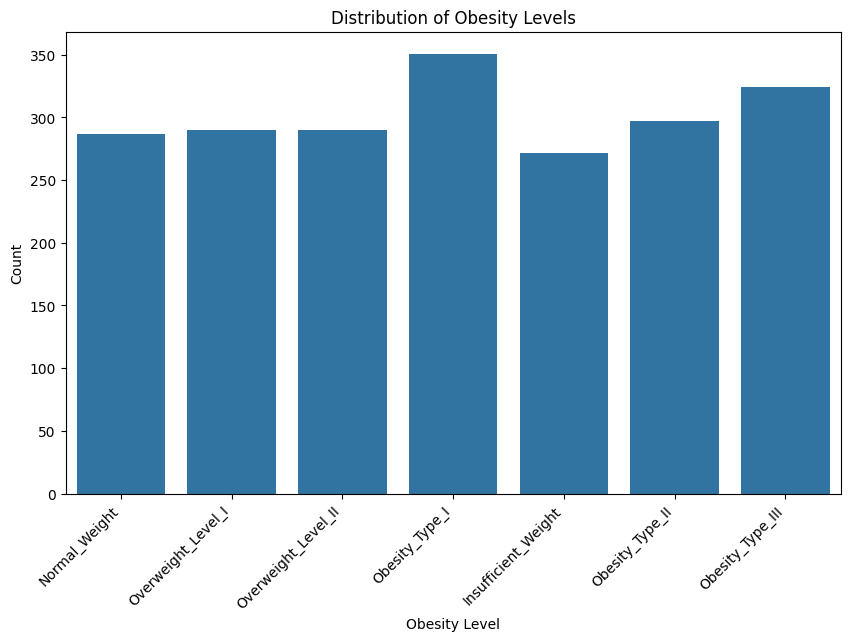

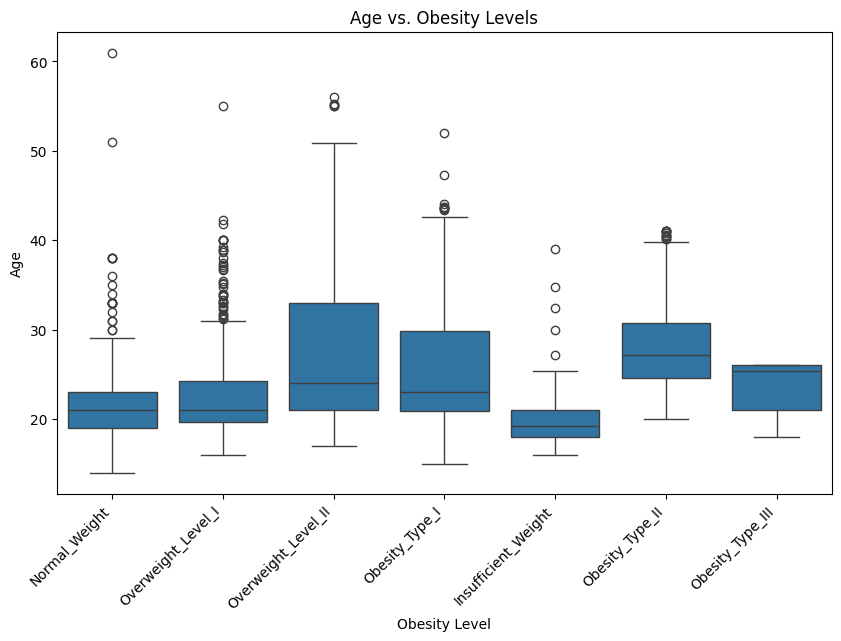

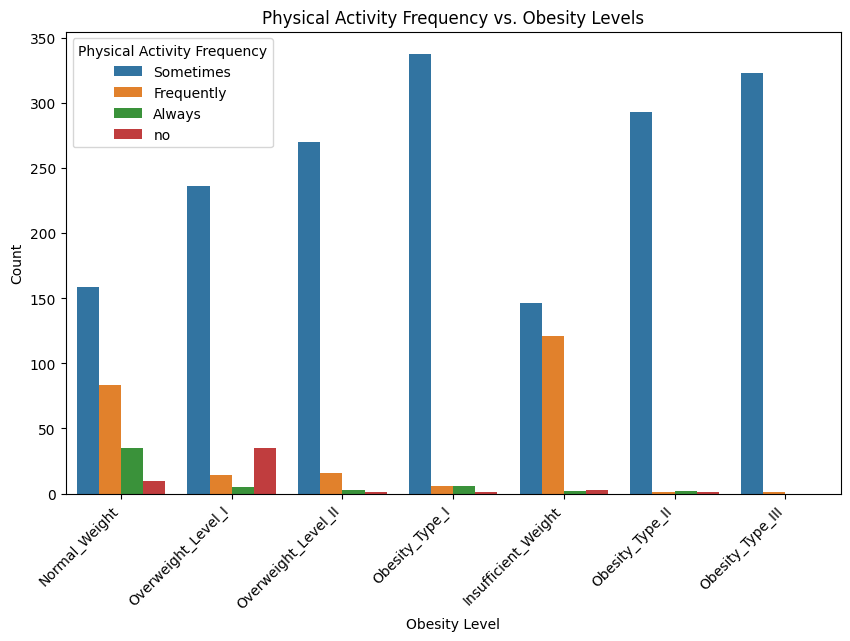

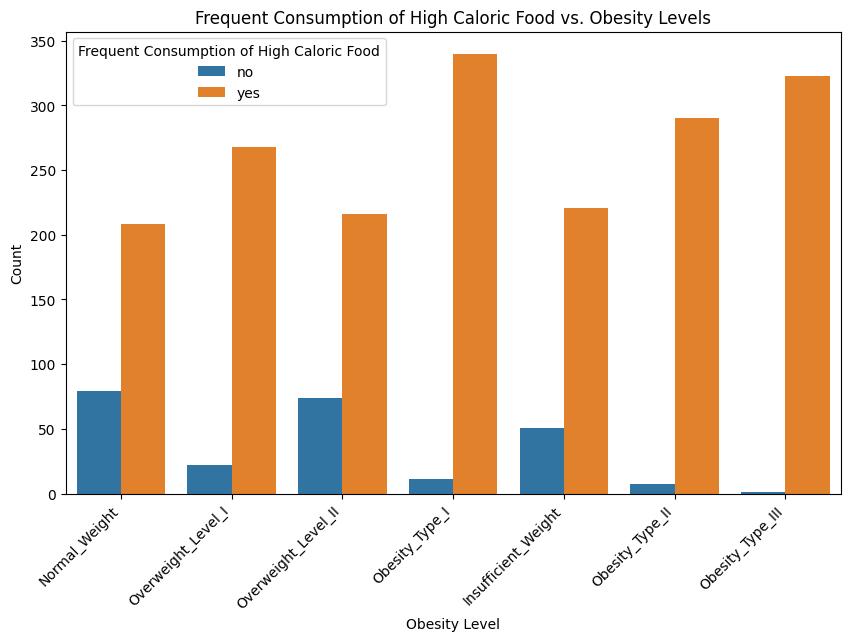

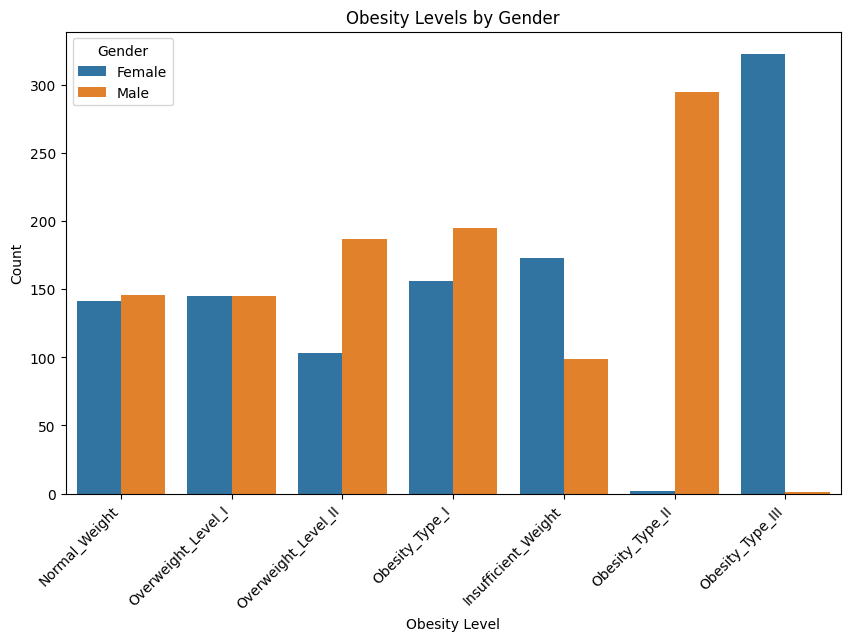

In [13]:

# Analyze the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Investigate how age might influence obesity levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=df)
plt.title('Age vs. Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore the relationship between physical activity frequency and obesity
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='CAEC', data=df)
plt.title('Physical Activity Frequency vs. Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Physical Activity Frequency')
plt.show()

# Examine the impact of different types of food consumption on obesity levels
# Example:  Analyzing 'FAVC' (Frequent consumption of high caloric food)
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='FAVC', data=df)
plt.title('Frequent Consumption of High Caloric Food vs. Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frequent Consumption of High Caloric Food')
plt.show()

# Assess if there are any observable differences in obesity levels based on gender
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=df)
plt.title('Obesity Levels by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

**Step 3: Prepare Data for Training**

● Split the dataset into features (inputs) and target (output).

● Encode categorical data if necessary using appropriate techniques such as one-hot encoding.

● Normalize or scale the feature data to ensure effective training of the neural network.

● Divide the data into training and testing sets to evaluate the model's performance.

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the features
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Build the Neural Network Model**

● Define the architecture of the neural network using a sequential model.

● Add input, hidden, and output layers. Choose activation functions for each
layer—commonly 'relu' for hidden layers and 'softmax' for the output layer if it's a classification problem.

● Configure the compilation of the model by selecting an optimizer, a loss function, and metrics to monitor (e.g., accuracy).

In [11]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Input layer
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dense(len(np.unique(y_train)), activation='softmax')) # Output layer (softmax for multi-class)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,359 (17.03 KB)

 Trainable params: 4,359 (17.03 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the Neural Network**

● Train the model on the dataset using the training data. Set parameters such as the number of epochs and batch size.

● Monitor the training process to check for issues like overfitting or underfitting.

In [14]:
# Convert target variable to numerical labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9734 - val_loss: 0.0831
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9763 - val_loss: 0.0849
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9704 - val_loss: 0.0856
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9763 - val_loss: 0.0816
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9734 - val_loss: 0.0819
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9734 - val_loss: 0.0859
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9734 - val_loss: 0.0840
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9763 - val_loss:

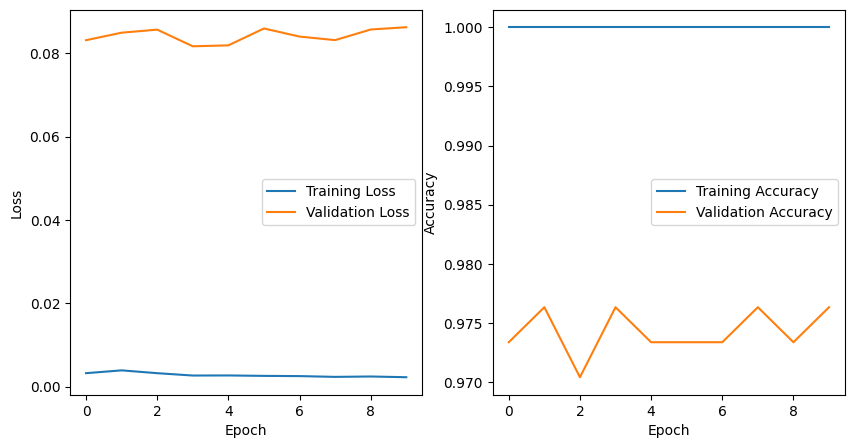

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9763 - val_loss: 0.0853
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9763 - val_loss: 0.0856
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9763 - val_loss: 0.0878
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9763 - val_loss: 0.0870
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9793 - val_loss: 0.0862
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9763 - val_loss: 0.0868
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9763 - val_loss: 0.0882
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9763 - val_loss:

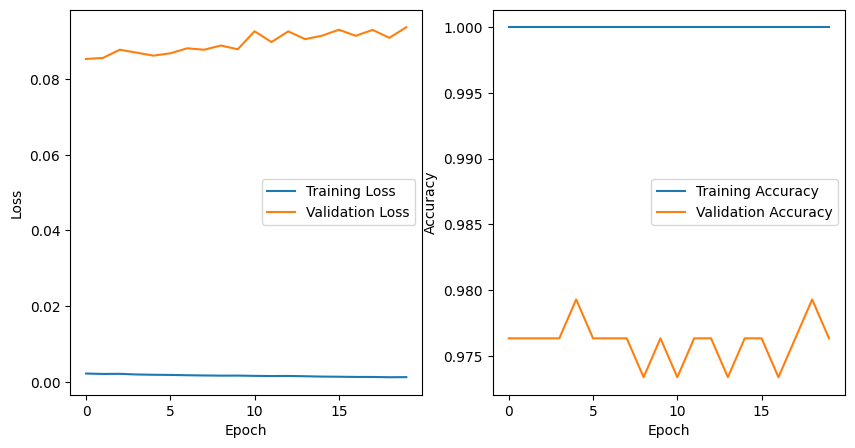

In [20]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2779 - loss: 1.8442 - val_accuracy: 0.5503 - val_loss: 1.4890
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5543 - loss: 1.4148 - val_accuracy: 0.6036 - val_loss: 1.1147
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 1.0718 - val_accuracy: 0.6982 - val_loss: 0.8938
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.8781 - val_accuracy: 0.7515 - val_loss: 0.7550
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7730 - loss: 0.7372 - val_accuracy: 0.7692 - val_loss: 0.6543
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.6483 - val_accuracy: 0.8254 - val_loss: 0.5742
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8519 - loss: 0.5347 - val_accuracy: 0.8254 - val_loss: 0.5176
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.4779 - val_accuracy: 0.8432 - val_loss:

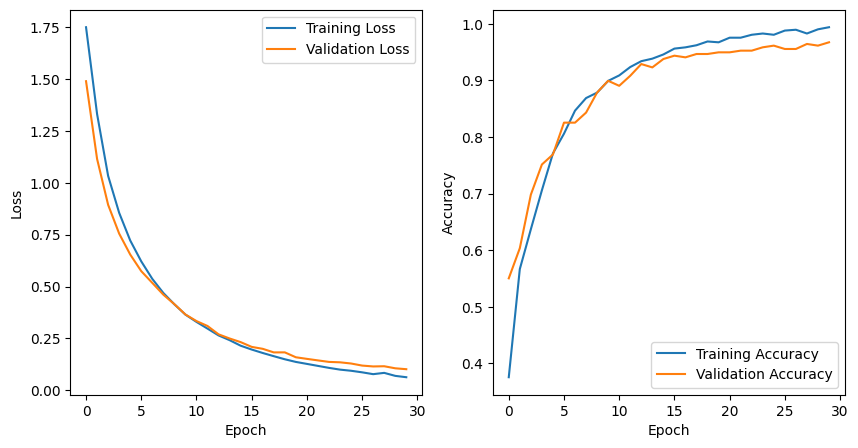

In [15]:
 history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9763 - val_loss: 0.0923
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9793 - val_loss: 0.0913
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9734 - val_loss: 0.0939
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8339e-04 - val_accuracy: 0.9734 - val_loss: 0.0956
Epoch 5/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9793 - val_loss: 0.0950
Epoch 6/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9734 - val_loss: 0.0958
Epoch 7/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9409e-04 - val_accuracy: 0.9734 - val_loss: 0.0950
Epoch 8/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.0369e-04 - val_accuracy: 0.9734

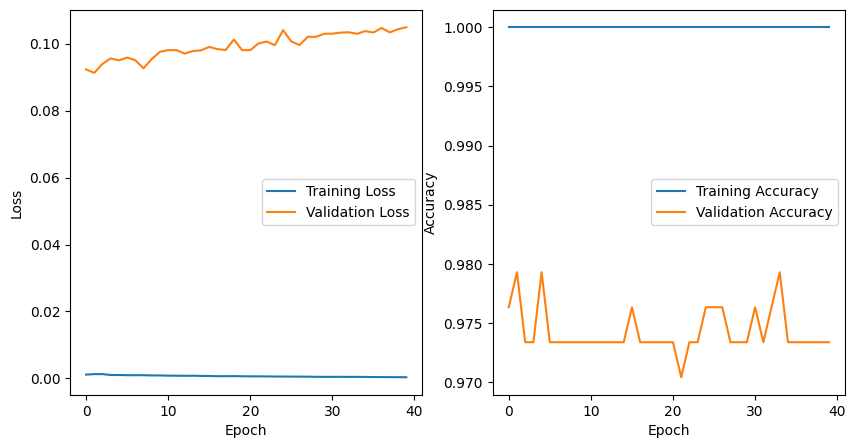

In [21]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Step 6: Evaluate the Model**
● Use the test set to evaluate the model's performance.

● Analyze the accuracy and other metrics to determine how well the model predicts new
data.

In [22]:


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Optionally, you can generate a classification report for more detailed evaluation
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1828 
Test Loss: 0.2155
Test Accuracy: 0.9385
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.91      0.84      0.87        62
           2       0.95      0.97      0.96        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.91      0.89        56
           6       0.98      0.88      0.93        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

